## Model tested:
1. openai - 4o-mini
2. Qwen code
3. llama 3.3
4. DeepSeek - V3
5. DeepSeek - R1

## Model to test:
1. Codestral
2. openai - o1
3. llamacode
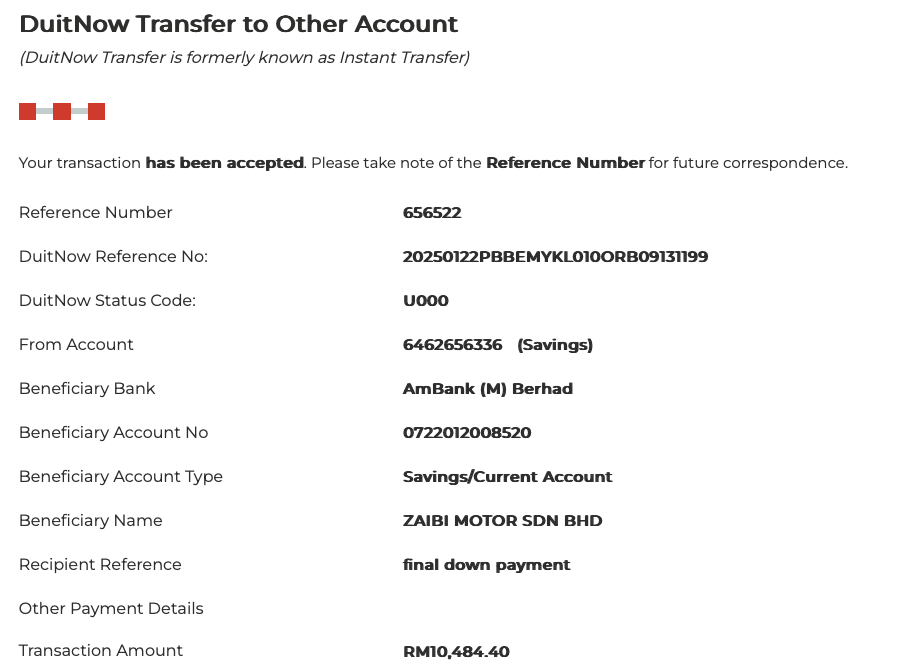

In [1]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
hf_key = user_secrets.get_secret("hf-token")
openai_key = user_secrets.get_secret("openai")
deepseek_key = user_secrets.get_secret("deepseek")
hyperbolic_bearer_token = user_secrets.get('hyperbolic_bearer')

In [2]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.1/456.1 kB 9.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.0/345.0 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.9 MB/s eta 0:00:00


In [3]:
import os
import json
import requests
import csv
from openai import OpenAI 
import os

In [4]:
questions = os.listdir('/kaggle/input/aoc-questions/questions/questions')
print(questions)



['day2_part2.txt', 'day19_part1.txt']


# Get solutions

In [10]:
ds_client = OpenAI(api_key=deepseek_key, base_url="https://api.deepseek.com")

def get_resp_from_deepseek(prompt,model):
    response = ds_client.chat.completions.create(
        model=model,
        messages=[
            {"role": "user", "content": prompt},
        ],
        stream=False
    )

    return(response)

In [6]:
url = "https://api.hyperbolic.xyz/v1/chat/completions"

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {hyperbolic_bearer_token}
    }

def get_resp_from_hyperbolic(prompt,model):
    data = {
        "messages": [
            {
                "role": "user",
                "content": prompt
            }
        ],
        "model": model,
        "max_tokens": 3048,
        "temperature": 1,
        "top_p": 0.9
    }
      
    response = requests.post(url, headers=headers, json=data)
    return response.json()

In [7]:
client = OpenAI(api_key = openai_key)

def get_resp_from_openai(prompt, model):
    response = client.chat.completions.create(
        model=model,
        store=True,
        messages=[
            {"role": "user", "content": prompt}
        ],
    )
    return response

In [9]:
dir = '/kaggle/input/aoc-questions/questions/questions'


with open('/kaggle/input/aoc-questions/outputs.json', 'r') as file:
    ref_inputs = json.load(file)
    print(ref_inputs)

k = 1
#hyperbolic
#openai
#deepseek
platform = 'deepseek'

# "codestral-latest"
#"deepseek-ai/DeepSeek-V3"
#"meta-llama/Llama-3.3-70B-Instruct"
#"deepseek-reasoner"

model =  "deepseek-reasoner"
model_to_write = "deepseek-reasoner"

year = 2024
columns = ['Year','Day','Part','prompt','solution','model','k']

print(f'Getting responses from {platform}: model: {model}...')
print(f'Results will be written to: {model_to_write}.csv')

with open(f'{model_to_write}.csv', mode="w", newline="", encoding="utf-8") as file:
        writer = csv.writer(file, delimiter=',')
        writer.writerow(columns)

        for n in range(k):
            for question in questions:
                print(question)
                day_count = question.split('_')[0]
                part = 'part1'
                try: 
                    with open(os.path.join(dir,question), 'r') as f:
                        prompt = f.read()
                    #ref_part1_input
                    try:
                        part1_answer = ref_inputs[day_count]['part1']
                    except:
                        print(f'failed to load ref input for {day_count}')
                except:
                    print(f'Failed to load question: {question}')        
                    
                if 'part2' in question:
                    prompt = prompt.format(part1_answer=part1_answer)
                    part = 'part2'
                    
                if platform == 'hyperbolic':
                    solution = get_resp_from_hyperbolic(f'Write a python program that read a file named "input.txt" to solve the following coding challenge, focus on {part}, no explanation, pure code:\n'+prompt,model)
                    try:
                        extracted_solution = solution.choices[0].message.content
                    except:
                        print(f'couldnt process: {solution}')

                elif platform == 'openai':
                    solution = get_resp_from_openai(f'Write a python program that read a file named "input.txt" to solve the following coding challenge, focus on {part}, no explanation, pure code:\n'+prompt,model)
                    try:
                        extracted_solution = solution.choices[0].message.content
                    except:
                        print(f'couldnt process: {solution}')

                elif platform == 'deepseek':
                    solution = get_resp_from_deepseek(f'Write a python program that read a file named "input.txt" to solve the following coding challenge, focus on {part}, no explanation, pure code:\n'+prompt,model)
                    try:
                        extracted_solution = solution.choices[0].message.content
                    except:
                        print(f'couldnt process: {solution}')
                        
                writer.writerow([year,day_count,part,prompt,extracted_solution,model_to_write,n+1])
                #break
                
file.close()
print("Done!")
    

{'day1': {'part1': '2378066', 'part2': '18934359'}, 'day2': {'part1': '341', 'part2': '404'}, 'day3': {'part1': '170807108', 'part2': '74838033'}, 'day4': {'part1': '2434', 'part2': '1835'}, 'day5': {'part1': '4766', 'part2': '6257'}, 'day6': {'part1': '4890', 'part2': '1995'}, 'day7': {'part1': '1298103531759', 'part2': '140575048428831'}, 'day8': {'part1': '332', 'part2': '1174'}, 'day9': {'part1': '6421128769094', 'part2': '6448168620520'}, 'day10': {'part1': '587', 'part2': '1340'}, 'day11': {'part1': '193607', 'part2': '229557103025807'}, 'day12': {'part1': '1377008', 'part2': '815788'}, 'day13': {'part1': '34787', 'part2': '85644161121698'}, 'day14': {'part1': '219150360', 'part2': '8053'}, 'day15': {'part1': '1499739', 'part2': '1522215'}, 'day16': {'part1': '94444', 'part2': '502'}, 'day17': {'part1': '7,5,4,3,4,5,3,4,6', 'part2': '164278899142333'}, 'day18': {'part1': '506', 'part2': '62,6'}, 'day19': {'part1': '267', 'part2': '796449099271652'}, 'day20': {'part1': '1307', 'pa

## Check the shape

In [8]:
import pandas as pd

df = pd.read_csv('/kaggle/working/solutions.csv')
df.shape

(49, 6)